In [195]:
import pandas as pd
import os

extract_path = r"C:\Users\xyz\Desktop\bodi2"

df = pd.read_csv(os.path.join(extract_path, "eth1h.csv"))



In [196]:
def find_highs(df, column_name):
    """
    Corrected function to find high points based on specified criteria.
    
    Parameters:
    - df: DataFrame containing the data
    - column_name: Name of the column to search for highs
    
    Returns:
    - highs: List of indices where high points are located
    """
    
    highs = []
    
    # First point
    if df[column_name].iloc[0] > df[column_name].iloc[1]:
        highs.append(df.index[0])
    
    # Middle points
    for i in range(1, len(df) - 1):
        if df[column_name].iloc[i] > df[column_name].iloc[i-1] and df[column_name].iloc[i] > df[column_name].iloc[i+1]:
            highs.append(df.index[i])
            
    # Last point
    if df[column_name].iloc[-1] > df[column_name].iloc[-2]:
        highs.append(df.index[-1])
    
    return highs

def find_lows(df, column_name):
    """
    Corrected function to find low points based on specified criteria.
    
    Parameters:
    - df: DataFrame containing the data
    - column_name: Name of the column to search for lows
    
    Returns:
    - lows: List of indices where low points are located
    """
    
    lows = []
    
    # First point
    if df[column_name].iloc[0] < df[column_name].iloc[1]:
        lows.append(df.index[0])
    
    # Middle points
    for i in range(1, len(df) - 1):
        if df[column_name].iloc[i] < df[column_name].iloc[i-1] and df[column_name].iloc[i] < df[column_name].iloc[i+1]:
            lows.append(df.index[i])
            
    # Last point
    if df[column_name].iloc[-1] < df[column_name].iloc[-2]:
        lows.append(df.index[-1])
    
    return lows

def refine_highs(df, column_name, target_length, min_length=2):
    """
    Refines the high points until the desired target length is achieved.

    Parameters:
    - df: DataFrame containing the data
    - column_name: Name of the column to search for highs
    - target_length: Desired number of high points

    Returns:
    - refined_highs: List of indices where refined high points are located
    """

    refined_highs = find_highs(df, column_name)

    # Keep refining the high points until the desired length is achieved
    while len(refined_highs) > target_length:
        last_refined_highs = refined_highs
        refined_highs = find_highs(df.iloc[refined_highs], column_name)
        if len(refined_highs) < min_length:
            refined_highs = last_refined_highs
            break

    return refined_highs

def refine_lows(df, column_name, target_length, min_length=2):
    """
    Refines the low points until the desired target length is achieved.

    Parameters:
    - df: DataFrame containing the data
    - column_name: Name of the column to search for lows
    - target_length: Desired number of low points

    Returns:
    - refined_lows: List of indices where refined low points are located
    """

    refined_lows = find_lows(df, column_name)
    # Keep refining the low points until the desired length is achieved
    while len(refined_lows) > target_length:
        last_refined_lows = refined_lows
        refined_lows = find_lows(df.iloc[refined_lows], column_name)
        if len(refined_lows) < min_length:
            refined_lows = last_refined_lows
            break
            
    return refined_lows

import os
import pandas as pd


#df = df.iloc[-500:].reset_index(drop=True)

# Test the corrected functions
high_points = find_highs(df, "Close")
low_points = find_lows(df, "Close")



In [197]:
# Load the data from the provided CSV file

# Test the refined function
high_points = refine_highs(df, "Close", 2)
high_points


[1079, 16281, 28067]

In [198]:

# Testing the refined function for lows
low_points = refine_lows(df, "Close", 2)
low_points


[1722, 21566]

In [199]:
def insert_missing_points(df, high_points, low_points, column_name_high, column_name_low):
    """
    Inserts missing low points between high points and vice-versa.

    Parameters:
    - df: DataFrame containing the data
    - high_points: List of high point indices
    - low_points: List of low point indices
    - column_name_high: Name of the column containing high values
    - column_name_low: Name of the column containing low values

    Returns:
    - updated_high_points: Updated list of high point indices
    - updated_low_points: Updated list of low point indices
    """
    
    updated_high_points = high_points.copy()
    updated_low_points = low_points.copy()

    # Check for missing low points between consecutive high points
    for i in range(len(high_points) - 1):
        segment = df.iloc[high_points[i]:high_points[i+1]+1]
        if not any(segment.index.isin(low_points)):
            min_idx = segment[column_name_low].idxmin()
            updated_low_points.append(min_idx)

    # Check for missing high points between consecutive low points
    for i in range(len(low_points) - 1):
        segment = df.iloc[low_points[i]:low_points[i+1]+1]
        if not any(segment.index.isin(high_points)):
            max_idx = segment[column_name_high].idxmax()
            updated_high_points.append(max_idx)

    # Sort the updated points
    updated_high_points.sort()
    updated_low_points.sort()

    return updated_high_points, updated_low_points

high_points, low_points = insert_missing_points(df, high_points, low_points, "Close", "Close")


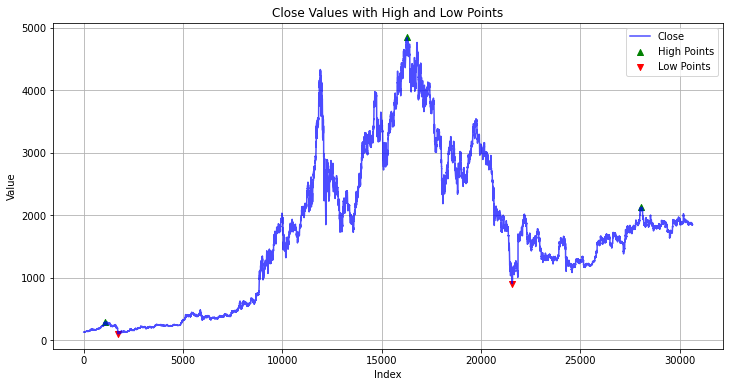

In [200]:
import matplotlib.pyplot as plt

def plot_with_highs_lows(df, column_name, high_indices, low_indices, 
                         title="Plot", xlabel="Index", ylabel="Value"):
    """
    Plots the specified column of the DataFrame and marks the high and low indices with different colors.

    Parameters:
    - df: DataFrame containing the data
    - column_name: Name of the column to be plotted
    - high_indices: List of high indices to be marked
    - low_indices: List of low indices to be marked
    - title: Title of the plot
    - xlabel: Label for the x-axis
    - ylabel: Label for the y-axis
    """
    
    plt.figure(figsize=(12, 6))
    
    # Plotting the specified column
    plt.plot(df[column_name], label=column_name, color='blue', alpha=0.7)
    
    # Marking the high indices
    plt.scatter(high_indices, df[column_name].iloc[high_indices], color='green', marker='^', label='High Points')
    
    # Marking the low indices
    plt.scatter(low_indices, df[column_name].iloc[low_indices], color='red', marker='v', label='Low Points')
    
    # Adding labels, title, legend and grid
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    
    plt.show()

# Using the updated plotting API to plot the Close values with the refined high and low points
plot_with_highs_lows(df, "Close", high_points, low_points, title="Close Values with High and Low Points")


In [105]:
// list of contextes / lookbacks to aggreate features over [25, 250, 1000]

for each row:
    for each lookback length: 
        // take lookback length
        // min max normalize of close
        // get last 4 highs&lows
        // get segmentation
        // extract features for each segment and make it feature of row
        
extract features trendy timeseries




SyntaxError: invalid syntax (<ipython-input-105-73ea8ad95530>, line 1)

In [201]:
## single features

def extract_segment_features(df, column_name="Close"):
    """Extract features for a given segment of data.
    
    Parameters:
    - df: Segment of the DataFrame
    - column_name: Name of the column to extract features from
    
    Returns:
    - feature: Mean of the percentage change of the Close prices for the segment
    """
    
    return df[column_name].pct_change().mean()

def process_row(df, idx, lookback, column_name="Close"):
    """Process a single row to extract features based on lookback.
    
    Parameters:
    - df: DataFrame containing the data
    - idx: Index of the row to process
    - lookback: Length of the lookback period
    - column_name: Name of the column to extract features from
    
    Returns:
    - features: Extracted features for the row
    """
    
    # Get the lookback window for the current index
    start_idx = max(0, idx - lookback)
    window_df = df.iloc[start_idx:idx+1].copy()
    
    # Reset the indices of the window dataframe
    window_df.reset_index(drop=True, inplace=True)
    
    # Normalize the Close prices within the window
    min_val = window_df[column_name].min()
    max_val = window_df[column_name].max()
    window_df["Normalized"] = (window_df[column_name] - min_val) / (max_val - min_val)
    
    # Find refined highs and lows
    highs = refine_highs(window_df, "Normalized", 4)
    lows = refine_lows(window_df, "Normalized", 4)
    
    # Combine and sort highs and lows to create segments
    extremas = sorted(highs + lows)[-4:]  # Only consider the last 4 extremas
    print("EXTREMA:", extremas)
    # Extract features for each segment
    features = []
    for i in range(len(extremas) - 1):
        segment = window_df.iloc[extremas[i]:extremas[i+1]]
        feature = extract_segment_features(segment)
        features.append(feature)
    
    # Include the segment from the last extrema to the end of the lookback window
    if extremas:
        segment = window_df.iloc[extremas[-1]:]
        feature = extract_segment_features(segment)
        features.append(feature)
    
    # If no segments were found, return NaN
    if not features:
        return [None] * 4
    
    # If less than 4 segments were found, fill the remaining with NaN
    while len(features) < 4:
        features.append(None)
    
    return features

def extract_features_from_df(df, lookbacks=[25, 250, 1000], column_name="Close"):
    """Extract features from the DataFrame for each lookback period.
    
    Parameters:
    - df: DataFrame containing the data
    - lookbacks: List of lookback periods
    - column_name: Name of the column to extract features from
    
    Returns:
    - df: DataFrame augmented with extracted features
    """
    print("lookbacks", lookbacks)
    for i in range(len(df)-1):
        row_features = {}

        for lookback in lookbacks:
            if i <= lookback:
                continue
            print("lookback", lookback)
            df_ = df.iloc[i-lookback:i]
            features = process_row(df, i, lookback, column_name="Close")
            print(len(features), "fts")
            #df[f"Feature_{lookback}_1"], df[f"Feature_{lookback}_2"], df[f"Feature_{lookback}_3"], df[f"Feature_{lookback}_4"] = zip(*features)
            for j, feature in enumerate(features, 1):
                row_features[f"Feature_{lookback}_{j}"] = feature
                

        features_data.append(row_features)

# Convert the placeholder to a DataFrame
    features_df = pd.DataFrame(features_data)

    # Concatenate the original DataFrame with the features DataFrame
    features_df = pd.concat([df, features_df], axis=1)

    # Display the augmented DataFrame with the extracted features

    return features_df

truncated_df = df.iloc[-500:].reset_index(drop=True)

# Re-run the feature extraction process
augmented_df = extract_features_from_df(truncated_df)

# Display the augmented DataFrame with the extracted features
augmented_df.head()


lookbacks [25, 250, 1000]
lookback 25
EXTREMA: [9, 14, 23, 25]
4 fts
lookback 25
EXTREMA: [8, 13, 22, 24]
4 fts
lookback 25
EXTREMA: [7, 12, 21, 25]
4 fts
lookback 25
EXTREMA: [6, 11, 20, 25]
4 fts
lookback 25
EXTREMA: [5, 10, 19, 24]
4 fts
lookback 25
EXTREMA: [4, 9, 18, 25]
4 fts
lookback 25
EXTREMA: [8, 17, 24, 25]
4 fts
lookback 25
EXTREMA: [7, 16, 24, 25]
4 fts
lookback 25
EXTREMA: [6, 15, 23, 24]
4 fts
lookback 25
EXTREMA: [5, 14, 22, 25]
4 fts
lookback 25
EXTREMA: [4, 13, 21, 25]
4 fts
lookback 25
EXTREMA: [3, 12, 20, 25]
4 fts
lookback 25
EXTREMA: [2, 11, 19, 24]
4 fts
lookback 25
EXTREMA: [1, 10, 18, 25]
4 fts
lookback 25
EXTREMA: [1, 9, 17, 24]
4 fts
lookback 25
EXTREMA: [2, 8, 16, 23]
4 fts
lookback 25
EXTREMA: [1, 7, 15, 22]
4 fts
lookback 25
EXTREMA: [15, 19, 21, 25]
4 fts
lookback 25
EXTREMA: [14, 18, 20, 25]
4 fts
lookback 25
EXTREMA: [13, 17, 19, 24]
4 fts
lookback 25
EXTREMA: [12, 16, 18, 23]
4 fts
lookback 25
EXTREMA: [11, 15, 17, 22]
4 fts
lookback 25
EXTREMA: [10, 1

KeyboardInterrupt: 

In [171]:
## multifeatures

def extract_segment_features(segment, feature_extractors, column_name="Close"):
    """Extract multiple features for a given segment of data.
    
    Parameters:
    - segment: Segment of the DataFrame
    - feature_extractors: List of feature extraction functions
    - column_name: Name of the column to extract features from
    
    Returns:
    - features: List of extracted features for the segment
    """
    return [feature_extractor(segment, column_name) for feature_extractor in feature_extractors]

def process_row_updated(df, idx, lookback, feature_extractors, column_name="Close"):
    """Updated version to process a single row to extract features based on lookback.
    
    Parameters:
    - df: DataFrame containing the data
    - idx: Index of the row to process
    - lookback: Length of the lookback period
    - feature_extractors: List of feature extraction functions
    - column_name: Name of the column to extract features from
    
    Returns:
    - features: Extracted features for the row
    """
    # Get the lookback window for the current index
    start_idx = max(0, idx - lookback)
    window_df = df.iloc[start_idx:idx+1].copy()
    
    # Reset the indices of the window dataframe
    window_df.reset_index(drop=True, inplace=True)
    
    # Normalize the Close prices within the window
    min_val = window_df[column_name].min()
    max_val = window_df[column_name].max()
    window_df["Normalized"] = (window_df[column_name] - min_val) / (max_val - min_val)
    
    # Find refined highs and lows
    highs = refine_highs(window_df, "Normalized", 4)
    lows = refine_lows(window_df, "Normalized", 4)
    
    # Combine and sort highs and lows to create segments
    extremas = sorted(highs + lows)[-4:]  # Only consider the last 4 extremas
    
    # Extract features for each segment
    all_features = []
    for i in range(len(extremas) - 1):
        segment = window_df.iloc[extremas[i]:extremas[i+1]]
        features = extract_segment_features(segment, feature_extractors)
        all_features.extend(features)
    
    # Include the segment from the last extrema to the end of the lookback window
    if extremas:
        segment = window_df.iloc[extremas[-1]:]
        features = extract_segment_features(segment, feature_extractors)
        all_features.extend(features)
    
    # If no segments were found, return NaN
    if not all_features:
        return [None] * len(extremas) * len(feature_extractors)
    
    return all_features

def extract_features_from_df_updated(df, lookbacks=[25, 250, 1000], feature_extractors=[mean_pct_change], column_name="Close"):
    """Updated version to extract features from the DataFrame for each lookback period.
    
    Parameters:
    - df: DataFrame containing the data
    - lookbacks: List of lookback periods
    - feature_extractors: List of feature extraction functions
    - column_name: Name of the column to extract features from
    
    Returns:
    - df: DataFrame augmented with extracted features
    """
    features_data = []

    for i in range(len(df)):
        row_features = {}
        for lookback in lookbacks:
            if i <= lookback:
                continue
            features = process_row_updated(df, i, lookback, feature_extractors, column_name)
            for j, feature in enumerate(features, 1):
                row_features[f"Feature_{lookback}_{j}"] = feature
        features_data.append(row_features)

    features_df = pd.DataFrame(features_data)
    augmented_df = pd.concat([df, features_df], axis=1)

    return augmented_df

import numpy as np
from scipy.stats import skew, kurtosis

# Additional feature extractor functions

def mean_value(df, column_name):
    """Calculate the mean value of a column."""
    return df[column_name].mean()

def median_value(df, column_name):
    """Calculate the median value of a column."""
    return df[column_name].median()

def variance_value(df, column_name):
    """Calculate the variance of a column."""
    return df[column_name].var()

def std_dev_value(df, column_name):
    """Calculate the standard deviation of a column."""
    return df[column_name].std()

def skewness_value(df, column_name):
    """Calculate the skewness of a column."""
    return skew(df[column_name])

def kurtosis_value(df, column_name):
    """Calculate the kurtosis of a column."""
    return kurtosis(df[column_name])

def mean_pct_change(df, column_name):
    """Calculate the mean percentage change of a column."""
    return df[column_name].pct_change().mean()

# Expand the list of feature extractor functions

# Re-run the feature extraction process using the extended feature extractors
augmented_df_extended = extract_features_from_df_updated(df, lookbacks=[24, 7*24], feature_extractors=feature_extractors_extended)

# Display the augmented DataFrame with the extracted features
augmented_df_extended.tail()


,Unnamed: 0,Open_time,Open,High,Low,Close,Volume,Close_time,Quote_asset_volume,Number_of_trades,...,Feature_24_7,Feature_24_8,Feature_168_1,Feature_168_2,Feature_168_3,Feature_168_4,Feature_168_5,Feature_168_6,Feature_168_7,Feature_168_8
13866,13870,2023-08-11 18:59:42.720,1843.95,1844.61,1841.64,1843.97,24912.983,1691783999999,4.592308e+07,23582,...,0.000535,1.128819,0.000476,2.553517,-0.000218,6.770356,-0.000549,6.633324,0.000535,1.128819
13867,13871,2023-08-11 20:00:52.736,1843.98,1845.10,1843.22,1845.09,18963.405,1691787599999,3.497073e+07,18530,...,0.000559,1.283563,0.000476,2.553517,-0.000218,6.770356,-0.000549,6.633324,0.000559,1.283563
13868,13872,2023-08-11 20:59:51.680,1845.10,1845.84,1843.00,1844.83,14427.807,1691791199999,2.661282e+07,18769,...,0.000384,1.211994,0.000476,2.553517,-0.000218,6.770356,-0.000549,6.633324,0.000384,1.211994
13869,13873,2023-08-11 22:01:01.696,1844.82,1846.67,1844.27,1845.72,12951.209,1691794799999,2.390141e+07,14867,...,NaN,NaN,0.000476,2.553517,-0.000218,6.770356,-0.000549,6.633324,0.000404,1.299191
13870,13874,2023-08-11 23:00:00.640,1845.73,1851.58,1845.31,1848.04,38004.132,1691798399999,7.024763e+07,29909,...,NaN,NaN,0.000476,2.553517,-0.000218,6.770356,-0.000549,6.633324,0.000546,1.857305


In [206]:
### also extract volume features

import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

# Load the data
#df = pd.read_csv('/mnt/data/eth1h.csv')
truncated_df = df.iloc[-1000:].reset_index(drop=True)
# Implementing the changes for volume features extraction based on the highs and lows from close prices
# Volumen feature extractor functions

def total_volume(df, column_name="Volume"):
    """Calculate the total volume for the segment."""
    return df[column_name].sum()

def mean_volume(df, column_name="Volume"):
    """Calculate the mean volume for the segment."""
    return df[column_name].mean()

def volume_variance(df, column_name="Volume"):
    """Calculate the variance of the volume for the segment."""
    return df[column_name].var()

def volume_std_dev(df, column_name="Volume"):
    """Calculate the standard deviation of the volume for the segment."""
    return df[column_name].std()

def volume_skewness(df, column_name="Volume"):
    """Calculate the skewness of the volume for the segment."""
    return skew(df[column_name])

def volume_kurtosis(df, column_name="Volume"):
    """Calculate the kurtosis of the volume for the segment."""
    return kurtosis(df[column_name])

def process_row_volume_updated(df, idx, lookback, feature_extractors, volume_feature_extractors, column_name="Close", volume_column_name="Volume"):
    """Process a single row to extract features based on lookback for both price and volume.
    
    Parameters:
    - df: DataFrame containing the data
    - idx: Index of the row to process
    - lookback: Length of the lookback period
    - feature_extractors: List of feature extraction functions for price
    - column_name: Name of the column to extract price features from
    - volume_column_name: Name of the column to extract volume features from
    
    Returns:
    - features: Extracted features for the row
    """
    # Get the lookback window for the current index
    start_idx = max(0, idx - lookback)
    window_df = df.iloc[start_idx:idx].copy()
    
    # Reset the indices of the window dataframe
    window_df.reset_index(drop=True, inplace=True)
    
    # Normalize the Close prices within the window
    min_val = window_df[column_name].min()
    max_val = window_df[column_name].max()
    window_df["Normalized"] = (window_df[column_name] - min_val) / (max_val - min_val)
    
    # Find refined highs and lows
    highs = refine_highs(window_df, "Normalized", 4)
    lows = refine_lows(window_df, "Normalized", 4)
    
    # Combine and sort highs and lows to create segments
    extremas = sorted(highs + lows)[-4:]  # Only consider the last 4 extremas
    
    # Extract features for each segment
    all_features = []
    for i in range(len(extremas) - 1):
        segment = window_df.iloc[extremas[i]:extremas[i+1]]
        features = extract_segment_features(segment, feature_extractors)
        volume_features = extract_segment_features(segment, volume_feature_extractors, column_name=volume_column_name)
        all_features.extend(features + volume_features)
    
    # Include the segment from the last extrema to the end of the lookback window
    if extremas:
        segment = window_df.iloc[extremas[-1]:]
        features = extract_segment_features(segment, feature_extractors)
        volume_features = extract_segment_features(segment, volume_feature_extractors, column_name=volume_column_name)
        all_features.extend(features + volume_features)
    
    ## add relative prices to extrema
    rel_prices = [window_df.iloc[ex]["Normalized"] - window_df.iloc[-1]["Normalized"]  for ex in extremas]
    all_features.extend(rel_prices)
    
    ## extrema values
    extrema_prices = [window_df.iloc[ex]["Normalized"] for ex in extremas]
    all_features.extend(extrema_prices)
    
    # If no segments were found, return NaN
    if not all_features:
        return [None] * len(extremas) * ((len(feature_extractors) + len(volume_feature_extractors)) + len(rel_prices) + len(extrema_prices))
    
    return all_features

# Provided utility functions
def find_highs(df, column_name):
    highs = []
    if df[column_name].iloc[0] > df[column_name].iloc[1]:
        highs.append(df.index[0])
    for i in range(1, len(df) - 1):
        if df[column_name].iloc[i] > df[column_name].iloc[i-1] and df[column_name].iloc[i] > df[column_name].iloc[i+1]:
            highs.append(df.index[i])
    if df[column_name].iloc[-1] > df[column_name].iloc[-2]:
        highs.append(df.index[-1])
    return highs

def find_lows(df, column_name):
    lows = []
    if df[column_name].iloc[0] < df[column_name].iloc[1]:
        lows.append(df.index[0])
    for i in range(1, len(df) - 1):
        if df[column_name].iloc[i] < df[column_name].iloc[i-1] and df[column_name].iloc[i] < df[column_name].iloc[i+1]:
            lows.append(df.index[i])
    if df[column_name].iloc[-1] < df[column_name].iloc[-2]:
        lows.append(df.index[-1])
    return lows

def refine_highs(df, column_name, target_length, min_length=2):
    refined_highs = find_highs(df, column_name)
    while len(refined_highs) > target_length:
        last_refined_highs = refined_highs
        refined_highs = find_highs(df.iloc[refined_highs], column_name)
        if len(refined_highs) < min_length:
            refined_highs = last_refined_highs
            break
    return refined_highs

def refine_lows(df, column_name, target_length, min_length=2):
    refined_lows = find_lows(df, column_name)
    while len(refined_lows) > target_length:
        last_refined_lows = refined_lows
        refined_lows = find_lows(df.iloc[refined_lows], column_name)
        if len(refined_lows) < min_length:
            refined_lows = last_refined_lows
            break
    return refined_lows

# The provided code
def extract_segment_features(segment, feature_extractors, column_name="Close"):
    return [feature_extractor(segment, column_name) for feature_extractor in feature_extractors]

def extract_features_from_df_updated(df, lookbacks=[25, 250, 1000], feature_extractors=[mean_pct_change], volume_feature_extractors=[], column_name="Close"):
    features_data = []
    for i in range(len(df)):
        row_features = {}
        for lookback in lookbacks:
            if i <= lookback:
                continue
            features = process_row_volume_updated(df, i, lookback, feature_extractors,volume_feature_extractors, column_name)
            for j, feature in enumerate(features, 1):
                row_features[f"Feature_{lookback}_{j}"] = feature
        features_data.append(row_features)
    features_df = pd.DataFrame(features_data)
    augmented_df = pd.concat([df, features_df], axis=1)
    return augmented_df

# Extended list of feature extractor functions for volume
volume_feature_extractors = [
    total_volume,
    mean_volume
]
feature_extractors_extended = [
    mean_pct_change, 
    std_dev_value, 
]


# Re-run the feature extraction process using the extended feature extractors for volume
augmented_df_volume_updated = extract_features_from_df_updated(df, lookbacks=[6, 24, 4*24, 4*4*24, 4*4*24], feature_extractors=feature_extractors_extended, volume_feature_extractors=volume_feature_extractors)

# Display the augmented DataFrame with the extracted features
augmented_df_volume_updated.tail()


,Unnamed: 0,Open_time,Open,High,Low,Close,Volume,Close_time,Quote_asset_volume,Number_of_trades,...,Feature_384_19,Feature_384_20,Feature_384_21,Feature_384_22,Feature_384_23,Feature_384_24,Feature_384_25,Feature_384_26,Feature_384_27,Feature_384_28
30636,30640,2023-08-11 18:59:42.720,1843.95,1844.61,1841.64,1843.97,24912.983,1691783999999,4.592308e+07,23582,...,38811.215000,38811.215000,0.424857,-0.027205,0.430342,-0.021281,0.452062,0.0,0.457547,0.005924
30637,30641,2023-08-11 20:00:52.736,1843.98,1845.10,1843.22,1845.09,18963.405,1691787599999,3.497073e+07,18530,...,34178.471000,34178.471000,0.424528,-0.027534,0.430013,-0.021610,0.452062,0.0,0.457547,0.005924
30638,30642,2023-08-11 20:59:51.680,1845.10,1845.84,1843.00,1844.83,14427.807,1691791199999,2.661282e+07,18769,...,30374.704500,30374.704500,0.412242,-0.039820,0.417727,-0.033896,0.452062,0.0,0.457547,0.005924
30639,30643,2023-08-11 22:01:01.696,1844.82,1846.67,1844.27,1845.72,12951.209,1691794799999,2.390141e+07,14867,...,27185.325000,27185.325000,0.415094,-0.036968,0.420579,-0.031044,0.452062,0.0,0.457547,0.005924
30640,30644,2023-08-11 23:00:00.640,1845.73,1851.58,1845.31,1848.04,38004.132,1691798399999,7.024763e+07,29909,...,24812.972333,24812.972333,0.409010,-0.047155,0.414545,-0.041178,0.456166,0.0,0.461700,0.005977


In [207]:
augmented_df_volume_updated

,Unnamed: 0,Open_time,Open,High,Low,Close,Volume,Close_time,Quote_asset_volume,Number_of_trades,...,Feature_384_19,Feature_384_20,Feature_384_21,Feature_384_22,Feature_384_23,Feature_384_24,Feature_384_25,Feature_384_26,Feature_384_27,Feature_384_28
0,0,2020-01-01 00:00:00,129.16,129.19,128.68,128.87,7769.17336,1577840399999,1.000930e+06,2504,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020-01-01 01:00:00,128.87,130.65,128.78,130.64,11344.65516,1577843999999,1.474278e+06,4885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020-01-01 02:00:00,130.63,130.98,130.35,130.85,7603.35623,1577847599999,9.940256e+05,3046,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2020-01-01 03:00:00,130.85,130.89,129.94,130.20,4968.55433,1577851199999,6.473610e+05,2818,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2020-01-01 04:00:00,130.21,130.74,130.15,130.20,3397.90747,1577854799999,4.430067e+05,2264,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,30640,2023-08-11 18:59:42.720,1843.95,1844.61,1841.64,1843.97,24912.98300,1691783999999,4.592308e+07,23582,...,38811.215000,38811.215000,0.424857,-0.027205,0.430342,-0.021281,0.452062,0.0,0.457547,0.005924
30637,30641,2023-08-11 20:00:52.736,1843.98,1845.10,1843.22,1845.09,18963.40500,1691787599999,3.497073e+07,18530,...,34178.471000,34178.471000,0.424528,-0.027534,0.430013,-0.021610,0.452062,0.0,0.457547,0.005924
30638,30642,2023-08-11 20:59:51.680,1845.10,1845.84,1843.00,1844.83,14427.80700,1691791199999,2.661282e+07,18769,...,30374.704500,30374.704500,0.412242,-0.039820,0.417727,-0.033896,0.452062,0.0,0.457547,0.005924
30639,30643,2023-08-11 22:01:01.696,1844.82,1846.67,1844.27,1845.72,12951.20900,1691794799999,2.390141e+07,14867,...,27185.325000,27185.325000,0.415094,-0.036968,0.420579,-0.031044,0.452062,0.0,0.457547,0.005924


In [208]:
augmented_df_volume_updated.to_csv("1h_ETH_withFeatures_v2.csv")

In [ ]:
## todo exxtract features for volume too, define different feature extractor lists ...
# add distances to extrema, normalized extrema values itself, extract same features from detrended 